

> Work of module one to bootcamp machine learning architect at XP Educação.


1.   Using Dense Neural Network.
2.   Training transfer learning with VGG16.
3.   Comparation between network VGG16 with Dense Neural Network common using data set fashion mnist.





In [1]:
#imports libs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow.image import resize
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

In [2]:
#get dataset of mnist fashion
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# **Fashion mnist with VGG16**

In [3]:
def normalize_images(images):
    # initial zero ndarray
    normalized_images = np.zeros_like(images.astype(float))

    # The first images index is number of images where the other indices indicates
    # hieight, width and depth of the image
    num_images = images.shape[0]

    # Computing the minimum and maximum value of the input image to do the normalization based on them
    maximum_value, minimum_value = images.max(), images.min()

    # Normalize all the pixel values of the images to be from 0 to 1
    for img in range(num_images):
        normalized_images[img, ...] = (images[img, ...] - float(minimum_value)) / float(maximum_value - minimum_value)

    return normalized_images

#normalization and trnsform variable target in categorical
train_images = normalize_images(train_images)
test_images = normalize_images(test_images)

#reshape dataset from (28,28,1) to (32,32,3)
x_aux = np.expand_dims(train_images, axis=-1)
x_aux = np.repeat(x_aux, 3, axis=-1)
train_images_VGG = resize(x_aux, [32,32])

x_aux = np.expand_dims(test_images, axis=-1)
x_aux = np.repeat(x_aux, 3, axis=-1)
test_images_VGG = resize(x_aux, [32,32])

#convert to categorical labels and flatten data
train_labels_VGG = np_utils.to_categorical(train_labels)
test_labels_VGG = np_utils.to_categorical(test_labels)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

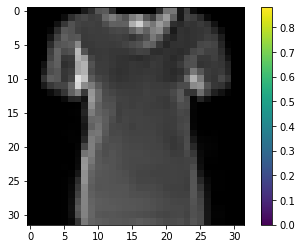

In [4]:
#visualization data categorical
display(train_labels_VGG[0])

#vizualization data
plt.figure()
plt.imshow(test_images_VGG[4000])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
#import VGG16 and add final layer
baseModel = tf.keras.applications.VGG16(
                include_top=False,
                weights='imagenet',
                input_tensor=None,
                input_shape=(32,32,3),
                pooling=None,
                classes=1000,
                classifier_activation="softmax",
            )

headModel = Flatten()(baseModel.output)
prediction = Dense(10, activation="softmax")(headModel)
model_VGG16 = Model(inputs=baseModel.input, outputs=prediction)

model_VGG16.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

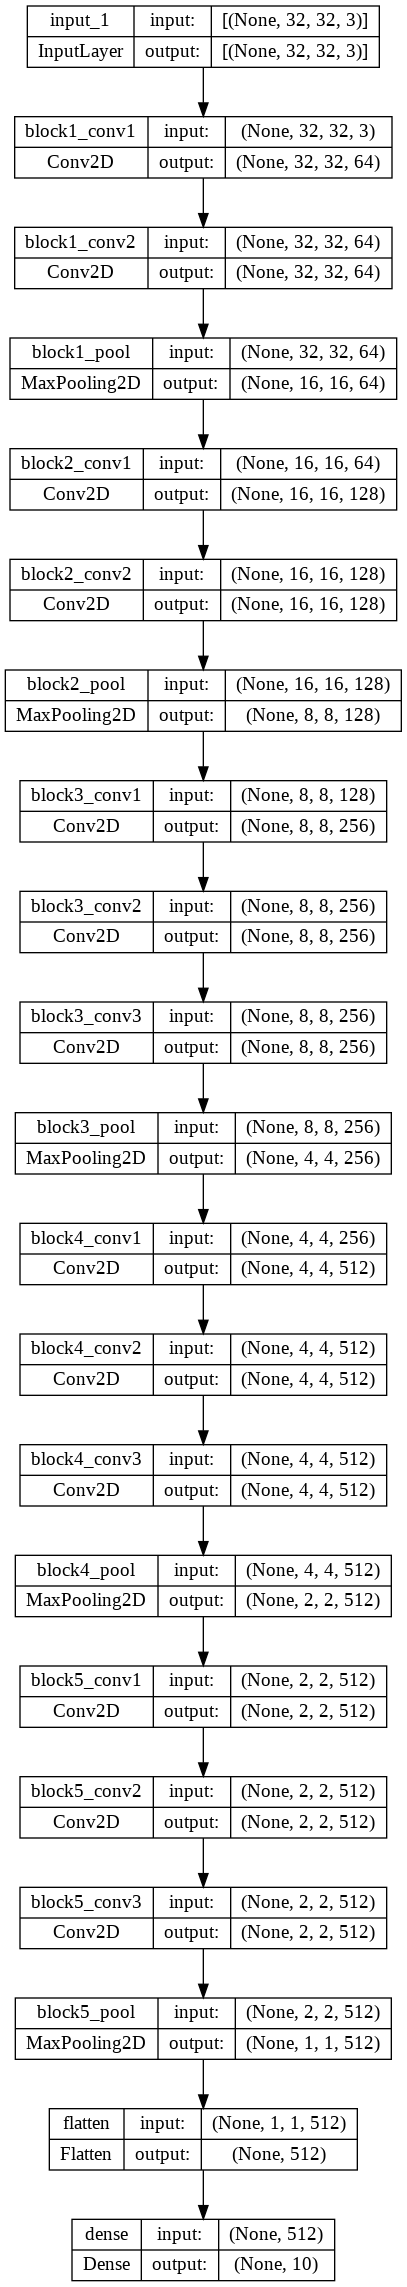

In [6]:
#plot model VGG16 
plot_model(model_VGG16, to_file='model_VGG16.png', show_shapes=True, show_layer_names=True)

In [7]:
#complile and fit model
model_VGG16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

result_VGG16 = model_VGG16.fit(train_images_VGG, train_labels_VGG, validation_data=(test_images_VGG, test_labels_VGG), 
                               epochs=5, verbose=1, batch_size=300)

Epoch 1/5
200/200 [==============================] - 32s 105ms/step - loss: 1.4174 - accuracy: 0.4919 - val_loss: 0.5377 - val_accuracy: 0.8081
Epoch 2/5
200/200 [==============================] - 20s 102ms/step - loss: 0.4083 - accuracy: 0.8531 - val_loss: 0.3365 - val_accuracy: 0.8801
Epoch 3/5
200/200 [==============================] - 21s 103ms/step - loss: 0.2936 - accuracy: 0.8952 - val_loss: 0.2831 - val_accuracy: 0.9003
Epoch 4/5
200/200 [==============================] - 21s 104ms/step - loss: 0.2493 - accuracy: 0.9112 - val_loss: 0.2678 - val_accuracy: 0.9068
Epoch 5/5
200/200 [==============================] - 21s 105ms/step - loss: 0.2156 - accuracy: 0.9222 - val_loss: 0.2552 - val_accuracy: 0.9167


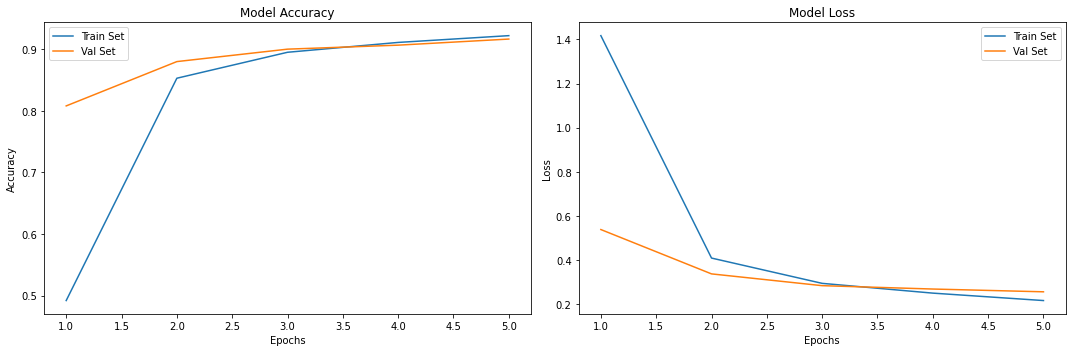

In [8]:
# Plot model performance
acc = result_VGG16.history['accuracy']
val_acc = result_VGG16.history['val_accuracy']
loss = result_VGG16.history['loss']
val_loss = result_VGG16.history['val_loss']
epochs_range = range(1, len(result_VGG16.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

# **Fashion mnist with Dense Neural Network common**

In [9]:
#transform values of pixels to float32 nomalized and flatten data
train_images_common = train_images.reshape(train_images.shape[0], 784).astype('float32') / 255
test_images_common = test_images.reshape(test_images.shape[0], 784).astype('float32') / 255

#convert to categorical labels
train_labels_common = np_utils.to_categorical(train_labels)
test_labels_common = np_utils.to_categorical(test_labels)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

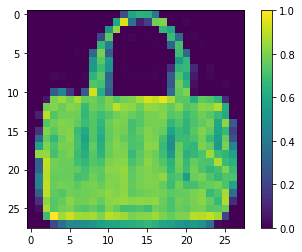

In [10]:
#visualization data categorical
display(train_labels_common[0])

#vizualization data
plt.figure()
plt.imshow(train_images[4000])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
#construct model DNN common
model_common = tf.keras.models.Sequential()
model_common.add(tf.keras.layers.Dense(units=784, activation='relu', input_dim=784))
model_common.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model_common.add(tf.keras.layers.Dense(units=2048, activation='relu'))
model_common.add(tf.keras.layers.Dense(units=2048, activation='relu'))
model_common.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model_common.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 784)               615440    
                                                                 
 dense_2 (Dense)             (None, 1024)              803840    
                                                                 
 dense_3 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_4 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_5 (Dense)             (None, 10)                20490     
                                                                 
Total params: 7,735,322
Trainable params: 7,735,322
Non-trainable params: 0
_________________________________________________________________


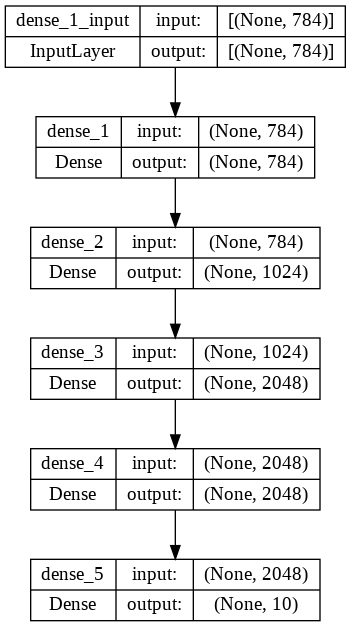

In [12]:
#plot model common
plot_model(model_common, to_file='model_common.png', show_shapes=True, show_layer_names=True)

In [13]:
#complile and fit model
model_common.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

result_dnn_common = model_common.fit(train_images_common, train_labels_common, validation_data=(test_images_common, test_labels_common),
                                     epochs=5, verbose=1, batch_size=300)

Epoch 1/5
200/200 [==============================] - 2s 8ms/step - loss: 0.8818 - accuracy: 0.6610 - val_loss: 0.6126 - val_accuracy: 0.7688
Epoch 2/5
200/200 [==============================] - 1s 7ms/step - loss: 0.5122 - accuracy: 0.8119 - val_loss: 0.4653 - val_accuracy: 0.8325
Epoch 3/5
200/200 [==============================] - 1s 7ms/step - loss: 0.4218 - accuracy: 0.8465 - val_loss: 0.4188 - val_accuracy: 0.8461
Epoch 4/5
200/200 [==============================] - 1s 7ms/step - loss: 0.3885 - accuracy: 0.8566 - val_loss: 0.4567 - val_accuracy: 0.8335
Epoch 5/5
200/200 [==============================] - 1s 7ms/step - loss: 0.3649 - accuracy: 0.8652 - val_loss: 0.3942 - val_accuracy: 0.8568


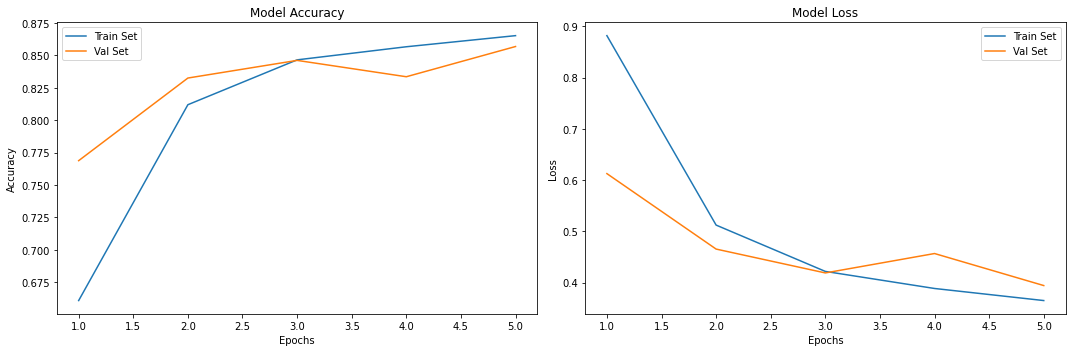

In [14]:
# Plot model performance
acc = result_dnn_common.history['accuracy']
val_acc = result_dnn_common.history['val_accuracy']
loss = result_dnn_common.history['loss']
val_loss = result_dnn_common.history['val_loss']
epochs_range = range(1, len(result_dnn_common.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()